# Case Study 02 


# Ensemble Learning

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

# Data preprocessing

In [6]:
df=pd.read_csv('C:\\Users\\pkmra_fk94jjw\\Downloads\\salary.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


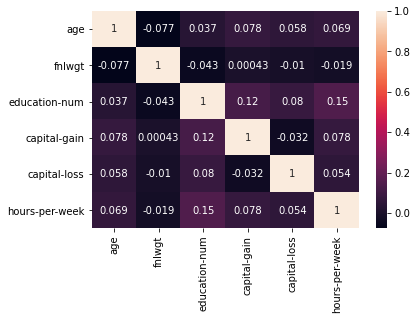

In [9]:
sns.heatmap(df.corr(), annot = True)

In [10]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

# Unique values check

In [11]:
print('Age:')
print(df['age'].unique())
print('Workclass:')
print(df['workclass'].unique())
print('fnlwgt:')
print(df['fnlwgt'].unique())
print('Education:')
print(df['education'].unique())
print(df['education'].nunique())
print('Education-num:')
print(df['education-num'].unique())
print(df['education-num'].nunique())
print('Marital-status')
print(df['marital-status'].unique())
print('Occupation:')
print(df['occupation'].unique())
print('Relationship:')
print(df['relationship'].unique())
print('Race:')
print(df['race'].unique())
print('Sex:')
print(df['sex'].unique())
print('Capital-gain:')
print(df['capital-gain'].unique())
print('Capital-loss:')
print(df['capital-loss'].unique())
print('Hours-per-week:')
print(df['hours-per-week'].unique())
print('Native-country:')
print(df['native-country'].unique())
print('Salary:')
print(df['Salary'].unique())

Age:
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
Workclass:
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
fnlwgt:
[ 77516  83311 215646 ...  34066  84661 257302]
Education:
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
16
Education-num:
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
16
Marital-status
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
Occupation:
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing'

KeyError: 'Salary'

In [12]:
df['workclass'].mode()[0]

' Private'

In [13]:
#Replacing '?' values with its mode
df['workclass'].replace(' ?', ' Private', inplace=True)

In [14]:
df['occupation'].mode()[0]

' Prof-specialty'

In [15]:
#Replacing '?' values with its mode
df['occupation']=df['occupation'].replace(' ?', ' Prof-specialty')

In [16]:
df['native-country'].mode()[0]

' United-States'

In [17]:
#Replacing '?' values with its mode
df['native-country']=df['native-country'].replace(' ?', ' United-States')

# One hot encoding

# Categorical features and numerical features

In [18]:
#salary
df['salary'] = pd.get_dummies(df['salary'], prefix='salary', drop_first=True)
#sex
df['sex'] = pd.get_dummies(df['sex'], prefix='sex', drop_first=True)

In [19]:
newwork=pd.get_dummies(df['workclass'], prefix='workclass')
df.drop('workclass',axis=1,inplace=True)

In [20]:
newmarital=pd.get_dummies(df['marital-status'], prefix='marital-status')
df.drop('marital-status',axis=1,inplace=True)

In [21]:
newoccupation=pd.get_dummies(df['occupation'], prefix='occupation')
df.drop('occupation',axis=1,inplace=True)

In [22]:
newrelationship=pd.get_dummies(df['relationship'], prefix='relationship')
df.drop('relationship',axis=1,inplace=True)

In [23]:
newrace=pd.get_dummies(df['race'], prefix='race')
df.drop('race',axis=1,inplace=True)

In [24]:
newnative=pd.get_dummies(df['native-country'], prefix='native-country')
df.drop('native-country',axis=1,inplace=True)

In [25]:
df.head()

,age,fnlwgt,education,education-num,sex,capital-gain,capital-loss,hours-per-week,salary
0,39,77516,Bachelors,13,1,2174,0,40,0
1,50,83311,Bachelors,13,1,0,0,13,0
2,38,215646,HS-grad,9,1,0,0,40,0
3,53,234721,11th,7,1,0,0,40,0
4,28,338409,Bachelors,13,0,0,0,40,0


In [26]:
df1=pd.concat([df,newwork,newmarital,newoccupation,newrelationship,newrace,newnative],axis=1)

In [27]:
#education-num is same as education, so dropping 'education' column
df1=df1.drop('education',axis=1)

In [28]:
df1.head()

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,salary,workclass_ Federal-gov,workclass_ Local-gov,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,1,2174,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,1,0,0,13,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,1,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,1,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,0,40,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Data splitting and testing

In [29]:
X=df1.drop('salary',axis=1)
y=df1['salary']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [31]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(24420, 88) (8141, 88)
(24420,) (8141,)


1.Decision tree

In [32]:
dectree = DecisionTreeClassifier()
dectree.fit(X_train,y_train)
y_pred=dectree.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8178356467264464


2. Random forest

In [33]:
rf_clf = RandomForestClassifier(random_state=42, n_estimators=100)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8620562584449085


3. Bagging classifier

In [34]:
bagging_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=250, random_state=42)
bagging_clf.fit(X_train, y_train)
y_pred = bagging_clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8598452278589854


4. Boosting classifier

In [35]:
ada_boost_clf = AdaBoostClassifier(n_estimators=100)
ada_boost_clf.fit(X_train, y_train)
y_pred = ada_boost_clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.872251566146665


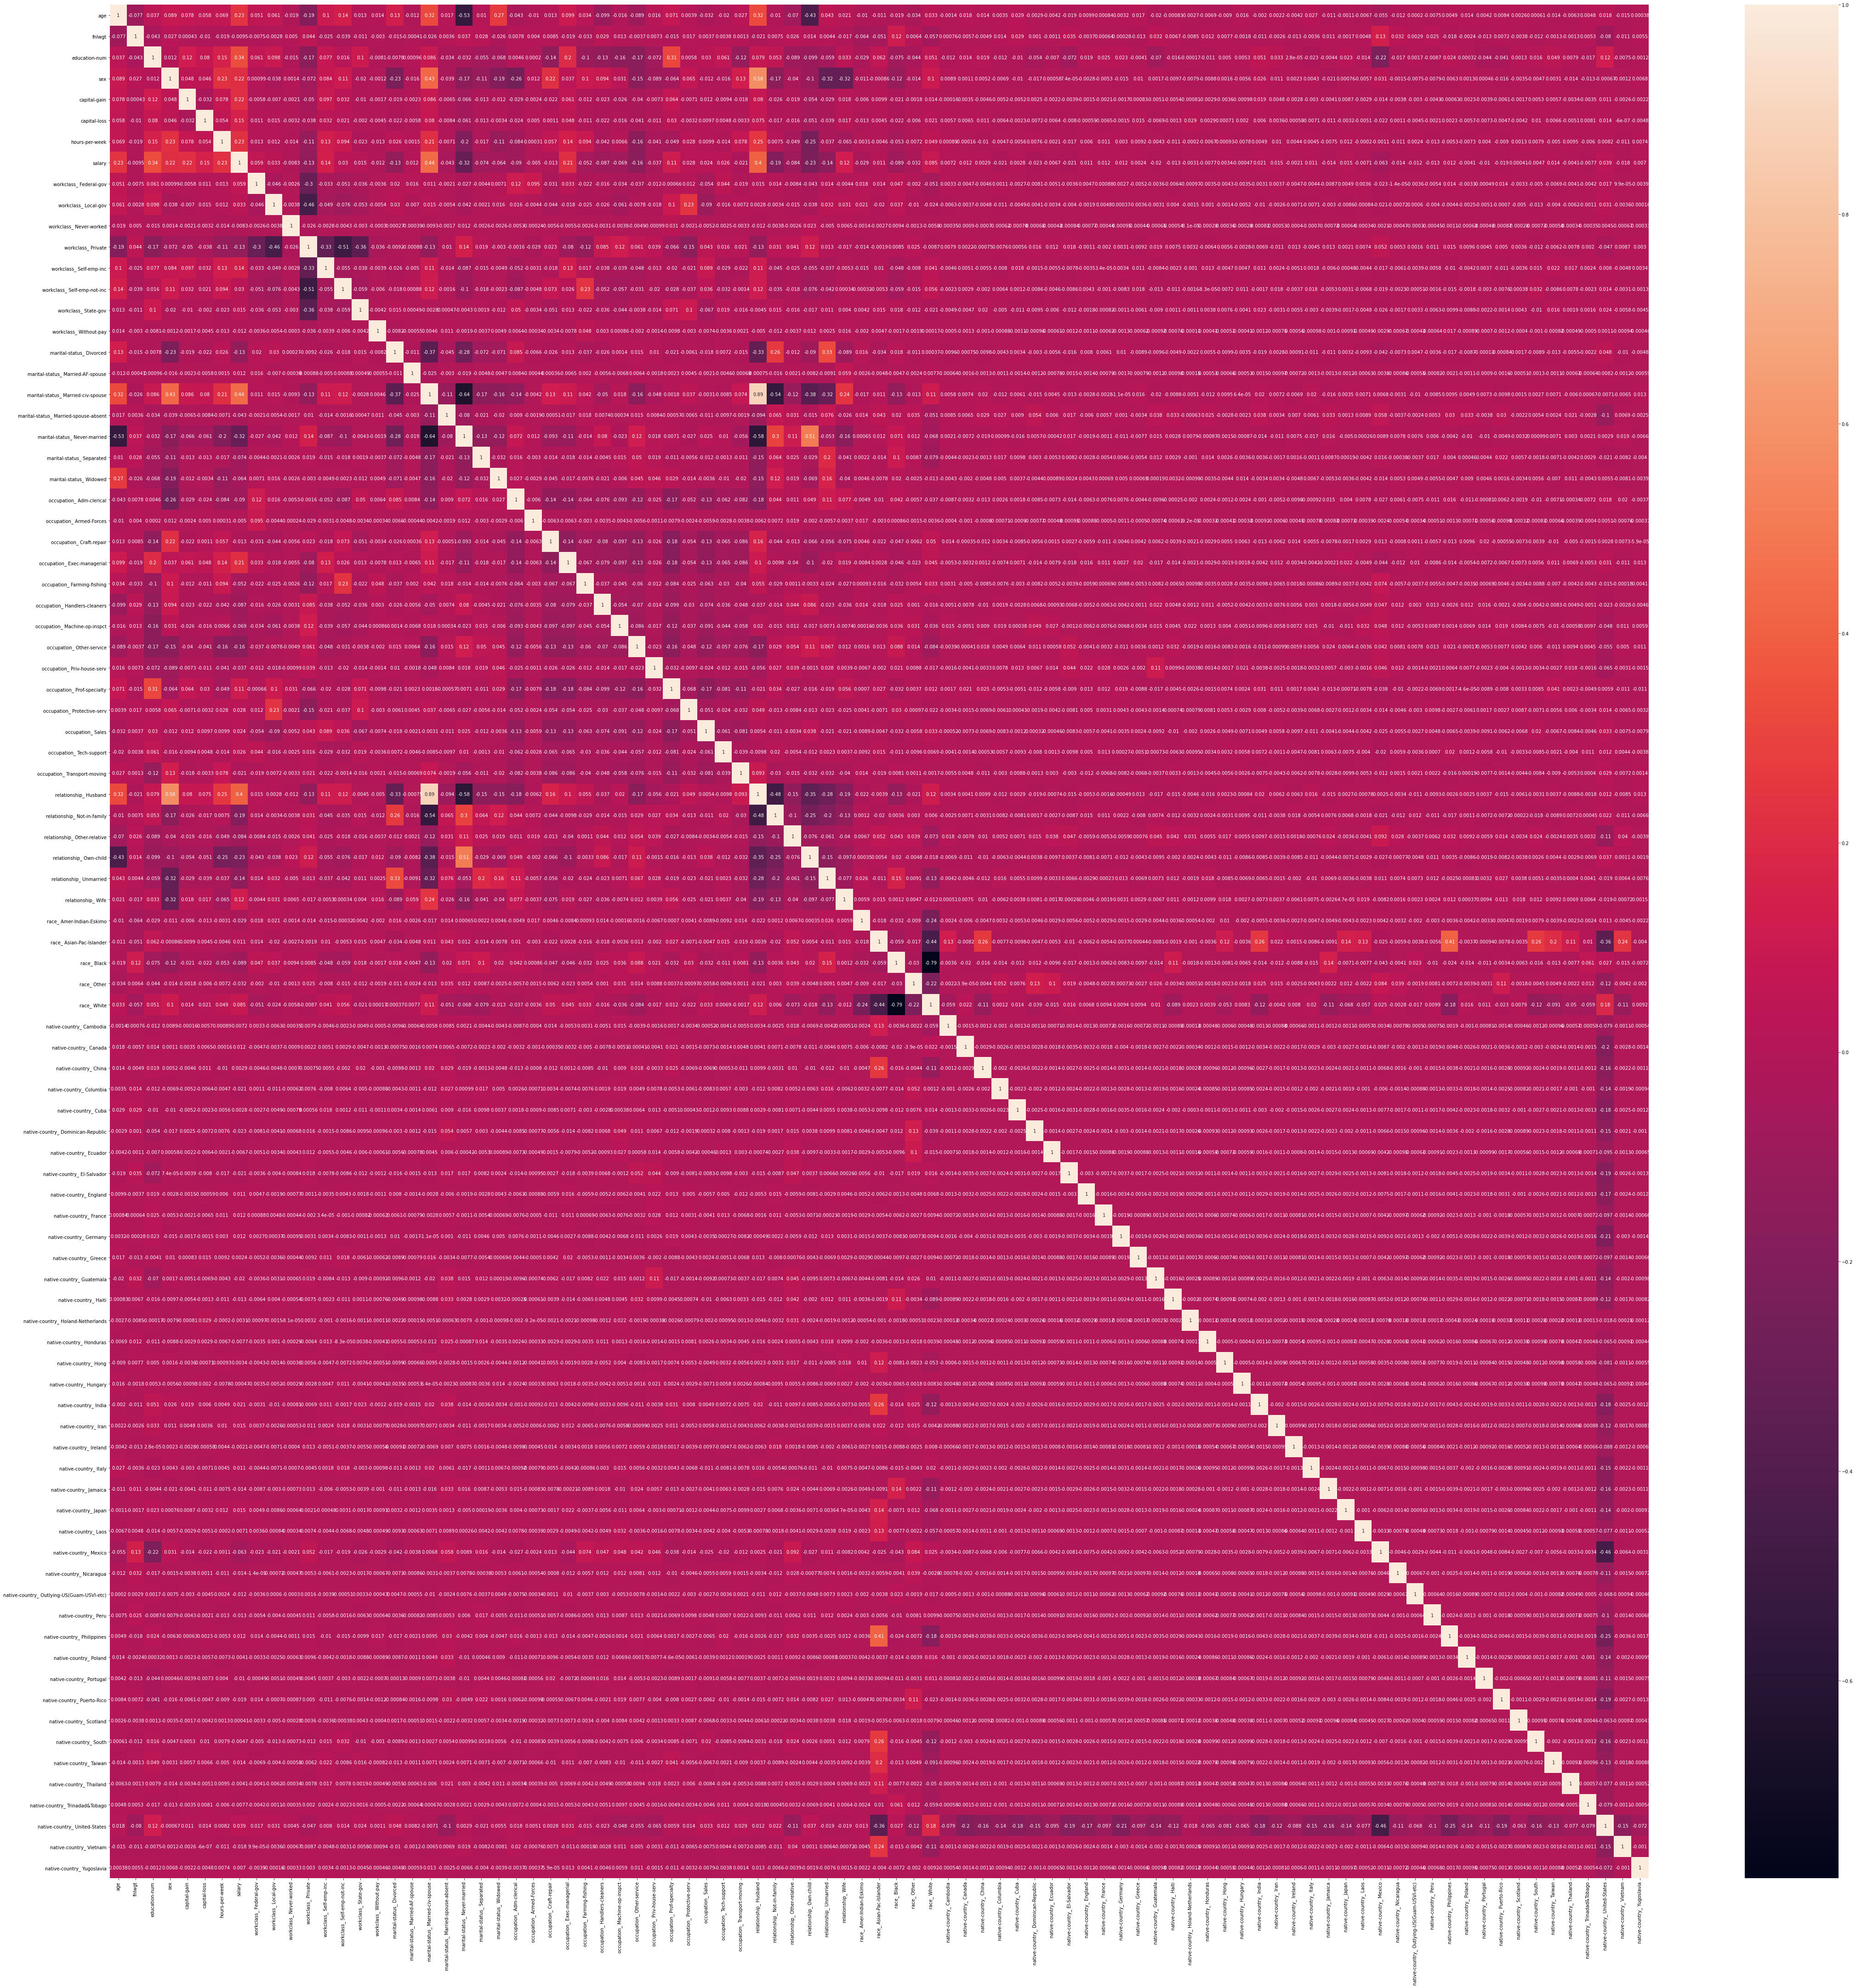

In [36]:
plt.figure(figsize=(75,75))
sns.heatmap(df1.corr(),annot = True)